In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

573

In [22]:
print("Starting Weather Check")
print("-----------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

city_name = []
country = []
lat = []
long = []
date = []
temp = []
humidity = []
clouds = []
wind = []
record_counter=0
set_counter=1

for record, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url+city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        if record_counter > 49:
            record_counter = 0
            set_counter = set_counter + 1
       
        else:
            record_counter = record_counter + 1
        
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City Not Found. Skipping...")
            
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Starting Weather Check
-----------------------
Processing Record 1 of Set 1 : new norfolk
Processing Record 2 of Set 1 : khatanga
Processing Record 3 of Set 1 : mahajanga
Processing Record 4 of Set 1 : shanghai
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : castro
Processing Record 7 of Set 1 : cidreira
Processing Record 8 of Set 1 : bredasdorp
Processing Record 9 of Set 1 : port elizabeth
Processing Record 10 of Set 1 : marsa matruh
Processing Record 11 of Set 1 : katherine
Processing Record 12 of Set 1 : faanui
Processing Record 13 of Set 1 : albany
Processing Record 14 of Set 1 : guerrero negro
Processing Record 15 of Set 1 : rikitea
City Not Found. Skipping...
Processing Record 16 of Set 1 : cedar city
Processing Record 17 of Set 1 : newport
Processing Record 18 of Set 1 : saskylakh
Processing Record 19 of Set 1 : ushuaia
Processing Record 20 of Set 1 : provideniya
Processing Record 21 of Set 1 : mataura
Processing Record 22 of Set 1 : henties bay
Processin

Processing Record 34 of Set 4 : sao joao da barra
Processing Record 35 of Set 4 : broome
Processing Record 36 of Set 4 : anju
Processing Record 37 of Set 4 : sakakah
Processing Record 38 of Set 4 : margate
Processing Record 39 of Set 4 : jining
Processing Record 40 of Set 4 : sayyan
Processing Record 41 of Set 4 : ochakiv
Processing Record 42 of Set 4 : atripalda
Processing Record 43 of Set 4 : henderson
Processing Record 44 of Set 4 : calvinia
Processing Record 45 of Set 4 : emerald
Processing Record 46 of Set 4 : souillac
Processing Record 47 of Set 4 : talnakh
Processing Record 48 of Set 4 : norden
Processing Record 49 of Set 4 : buchanan
Processing Record 50 of Set 4 : nabire
Processing Record 0 of Set 5 : samarai
Processing Record 1 of Set 5 : novo aripuana
City Not Found. Skipping...
Processing Record 2 of Set 5 : xuddur
Processing Record 3 of Set 5 : maceio
Processing Record 4 of Set 5 : tura
City Not Found. Skipping...
Processing Record 5 of Set 5 : marzuq
Processing Record 6 o

Processing Record 18 of Set 8 : nikolayevka
Processing Record 19 of Set 8 : kushmurun
Processing Record 20 of Set 8 : coxim
Processing Record 21 of Set 8 : harper
Processing Record 22 of Set 8 : barra
Processing Record 23 of Set 8 : geraldton
Processing Record 24 of Set 8 : xiangfan
Processing Record 25 of Set 8 : yermakovskoye
Processing Record 26 of Set 8 : kismayo
Processing Record 27 of Set 8 : marsh harbour
Processing Record 28 of Set 8 : le port
Processing Record 29 of Set 8 : flin flon
Processing Record 30 of Set 8 : mayor pablo lagerenza
Processing Record 31 of Set 8 : chatrapur
Processing Record 32 of Set 8 : dubbo
Processing Record 33 of Set 8 : kalmunai
Processing Record 34 of Set 8 : kaliua
Processing Record 35 of Set 8 : sibu
Processing Record 36 of Set 8 : waddan
Processing Record 37 of Set 8 : nome
Processing Record 38 of Set 8 : solenzo
Processing Record 39 of Set 8 : mayo
Processing Record 40 of Set 8 : griffith
City Not Found. Skipping...
Processing Record 41 of Set 8

533

In [24]:
city_data = pd.DataFrame({
            "City" : city_name,
            "Lat" : lat,
            "Lng" : long,
            "Max Temp" : temp,
            "Humidity" : humidity,
            "Cloudiness" : clouds,
            "Wind Speed" : wind,
            "Country" : country,
            "Date" : date
})
city_data.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  New Norfolk -42.7826  147.0587     65.91        59          10        1.99   
1     Khatanga  71.9667  102.5000     11.07        87         100       18.72   
2    Mahajanga -15.7167   46.3167     74.48        92         100        5.59   
3     Shanghai  31.2222  121.4581     46.26        62         100        1.99   
4    Busselton -33.6500  115.3333     83.08        42           7        5.86   

  Country        Date  
0      AU  1643098017  
1      RU  1643098017  
2      MG  1643098373  
3      CN  1643098238  
4      AU  1643098018

In [25]:
city_data.to_csv("output_data/cities.csv", index = False)

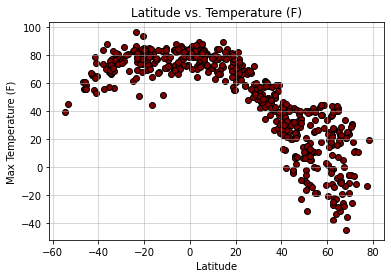

In [27]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], facecolor='maroon', edgecolor = 'black')

plt.title("Latitude vs. Temperature (F)")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)


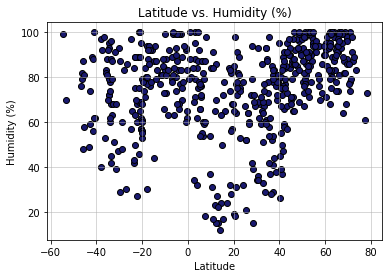

In [30]:
plt.scatter(city_data['Lat'], city_data['Humidity'], facecolor='midnightblue', edgecolor = 'black')

plt.title("Latitude vs. Humidity (%)")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

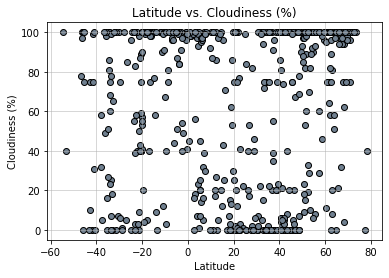

In [31]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], facecolor='slategrey', edgecolor = 'black')

plt.title("Latitude vs. Cloudiness (%)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

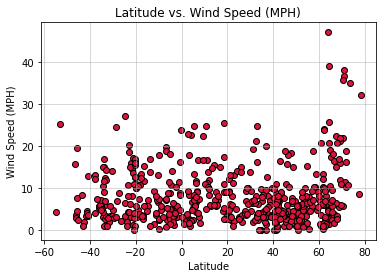

In [33]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], facecolor='crimson', edgecolor = 'black')

plt.title("Latitude vs. Wind Speed (MPH)")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (MPH)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

In [34]:
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]